# FRANCISCO, LEANN JOY Y. (3CSD)

# Summative Lab Exercise #1: Boston Pricing Prediction

---Detailed Task Objectives---

1.Exploratory Data Analysis (EDA) ✔:- 
○Perform EDA to gain insights into the data distribution and relationships between feature ✅s- 
○Visualize correlations between the input features and the target variable (MED✅V- .
○Identify and handle any missing data or outli✅
ers.
2.Data Preproces ✔s- ng:
○Normalization/Scaling: Apply appropriate scaling techniques to ensure the features are on a similar scale, which is crucial for linear m ✅o- els.
○Encoding: Handle categorical variables (if any) using suitable encoding m (SKIPPED)e- hods.
○Feature Selection: Analyze feature importance and potentially reduce dimensionality by selecting relevant f ✅e
atures.
3.Model Implem ✔e- tation:
○Baseline Model: Start with a simple linear regression model to establish a baseline p ✅r- ormance.
○Advanced Models: Implement Ridge Regression, Lasso Regression, and Elastic Net to improve the model by addressing overfitting and underfitt ✅i- g issues.
○Hyperparameter Tuning: Experiment with different hyperparameters (e.g., regularization strength) to optimize model  ✅p
erformance.
4.Mode ✔l- Evaluation:
○Evaluate the models using metrics such as Mean Squared Error (MSE), R-squared (R²), and Root Mean Squared ✅ - rror (RMSE).
○Compare the performance of different models and discuss  ✅t
he trade-offs.
5.Analysis and ✔ - nterpretation:
○Interpret the coefficients of the linear models to understand the impact of each feature on the ✅ - arget variable.
○Discuss the significance of regularization in red ✅u- ing overfitting.
○Provide insights into which features are most influential in predict ✅ults, and Conclusions.

In [4]:
# download the needed package
!pip install pandas numpy matplotlib seaborn scikit-learn

In [5]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_regression, RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from scipy import stats

In [6]:
# Load the dataset and convert it into a pandas dataframe
data = pd.read_csv("boston.csv")

# Display the first 5 rows of the dataset
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

# OBJECTIVE 1: EXPLORATORY DATA ANALYSIS (EDA)

In [8]:
# 1.1 Perform EDA to gain insights into the data distribution and relationships between features
# NOTE: perfom eda for all features then choose the best features to analyze

# describe basic statistics of the all features (optional)
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

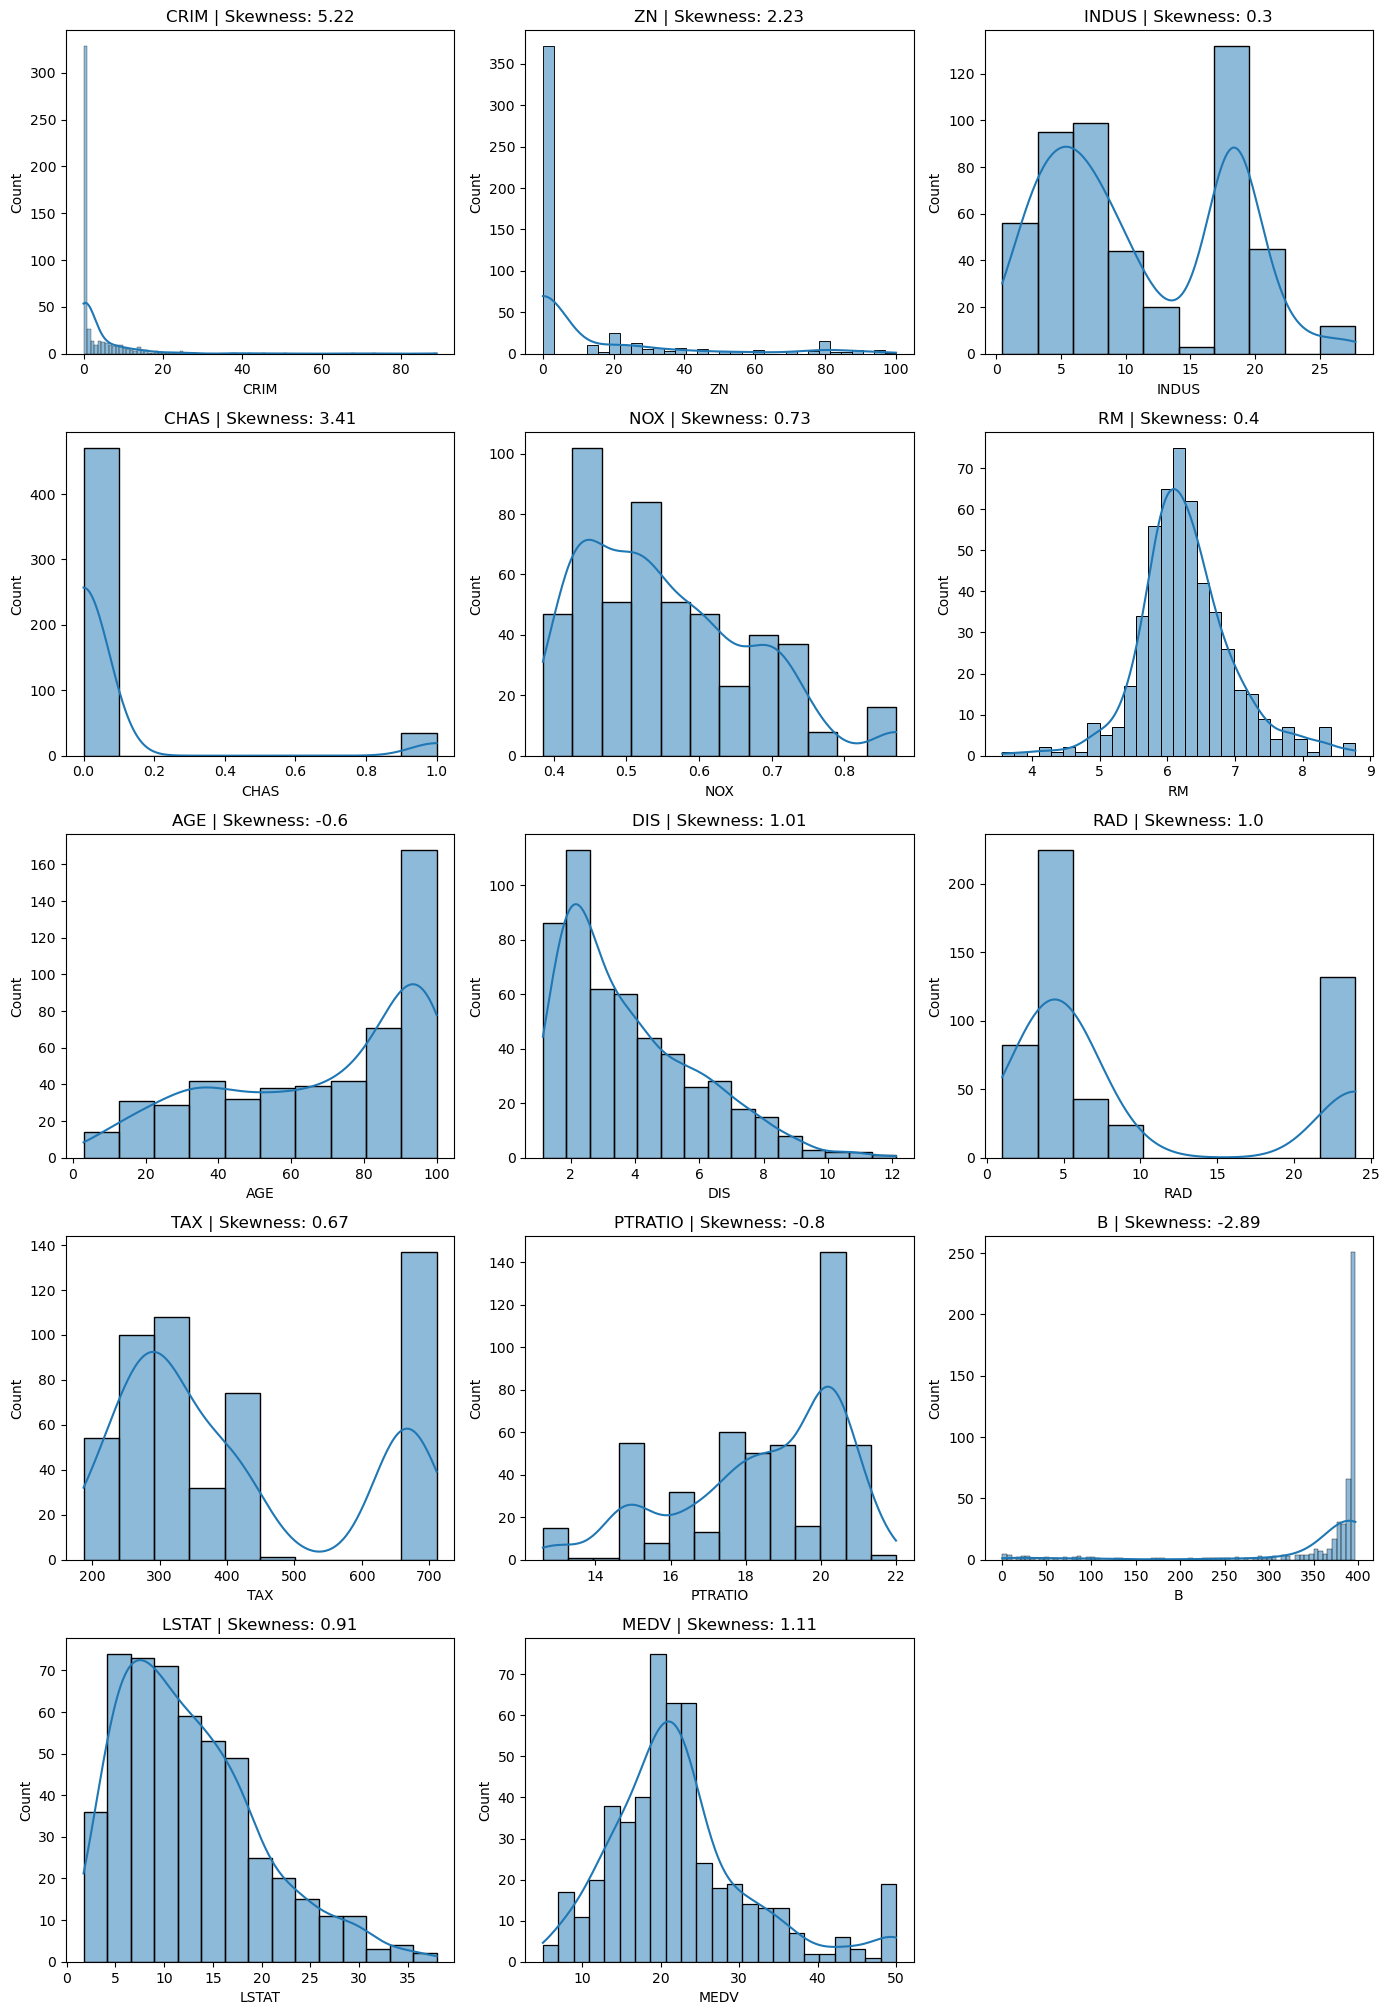

In [9]:
# DATA DISTRIBUTION: Univariate Analysis using Kernel Density Plot
plt.figure(figsize=(14, len(data.columns) * 4))  # Set figure size based on the number of features 
for idx, feature in enumerate(data.columns, 1):  
    plt.subplot(len(data.columns), 3, idx)  # Creating a subplot grid (3 subplot in 1 row)
    sns.histplot(data[feature], kde=True)  # Plotting histogram with KDE
    plt.title(f"{feature} | Skewness: {round(data[feature].skew(), 2)}")  #label

plt.tight_layout()   
plt.show()

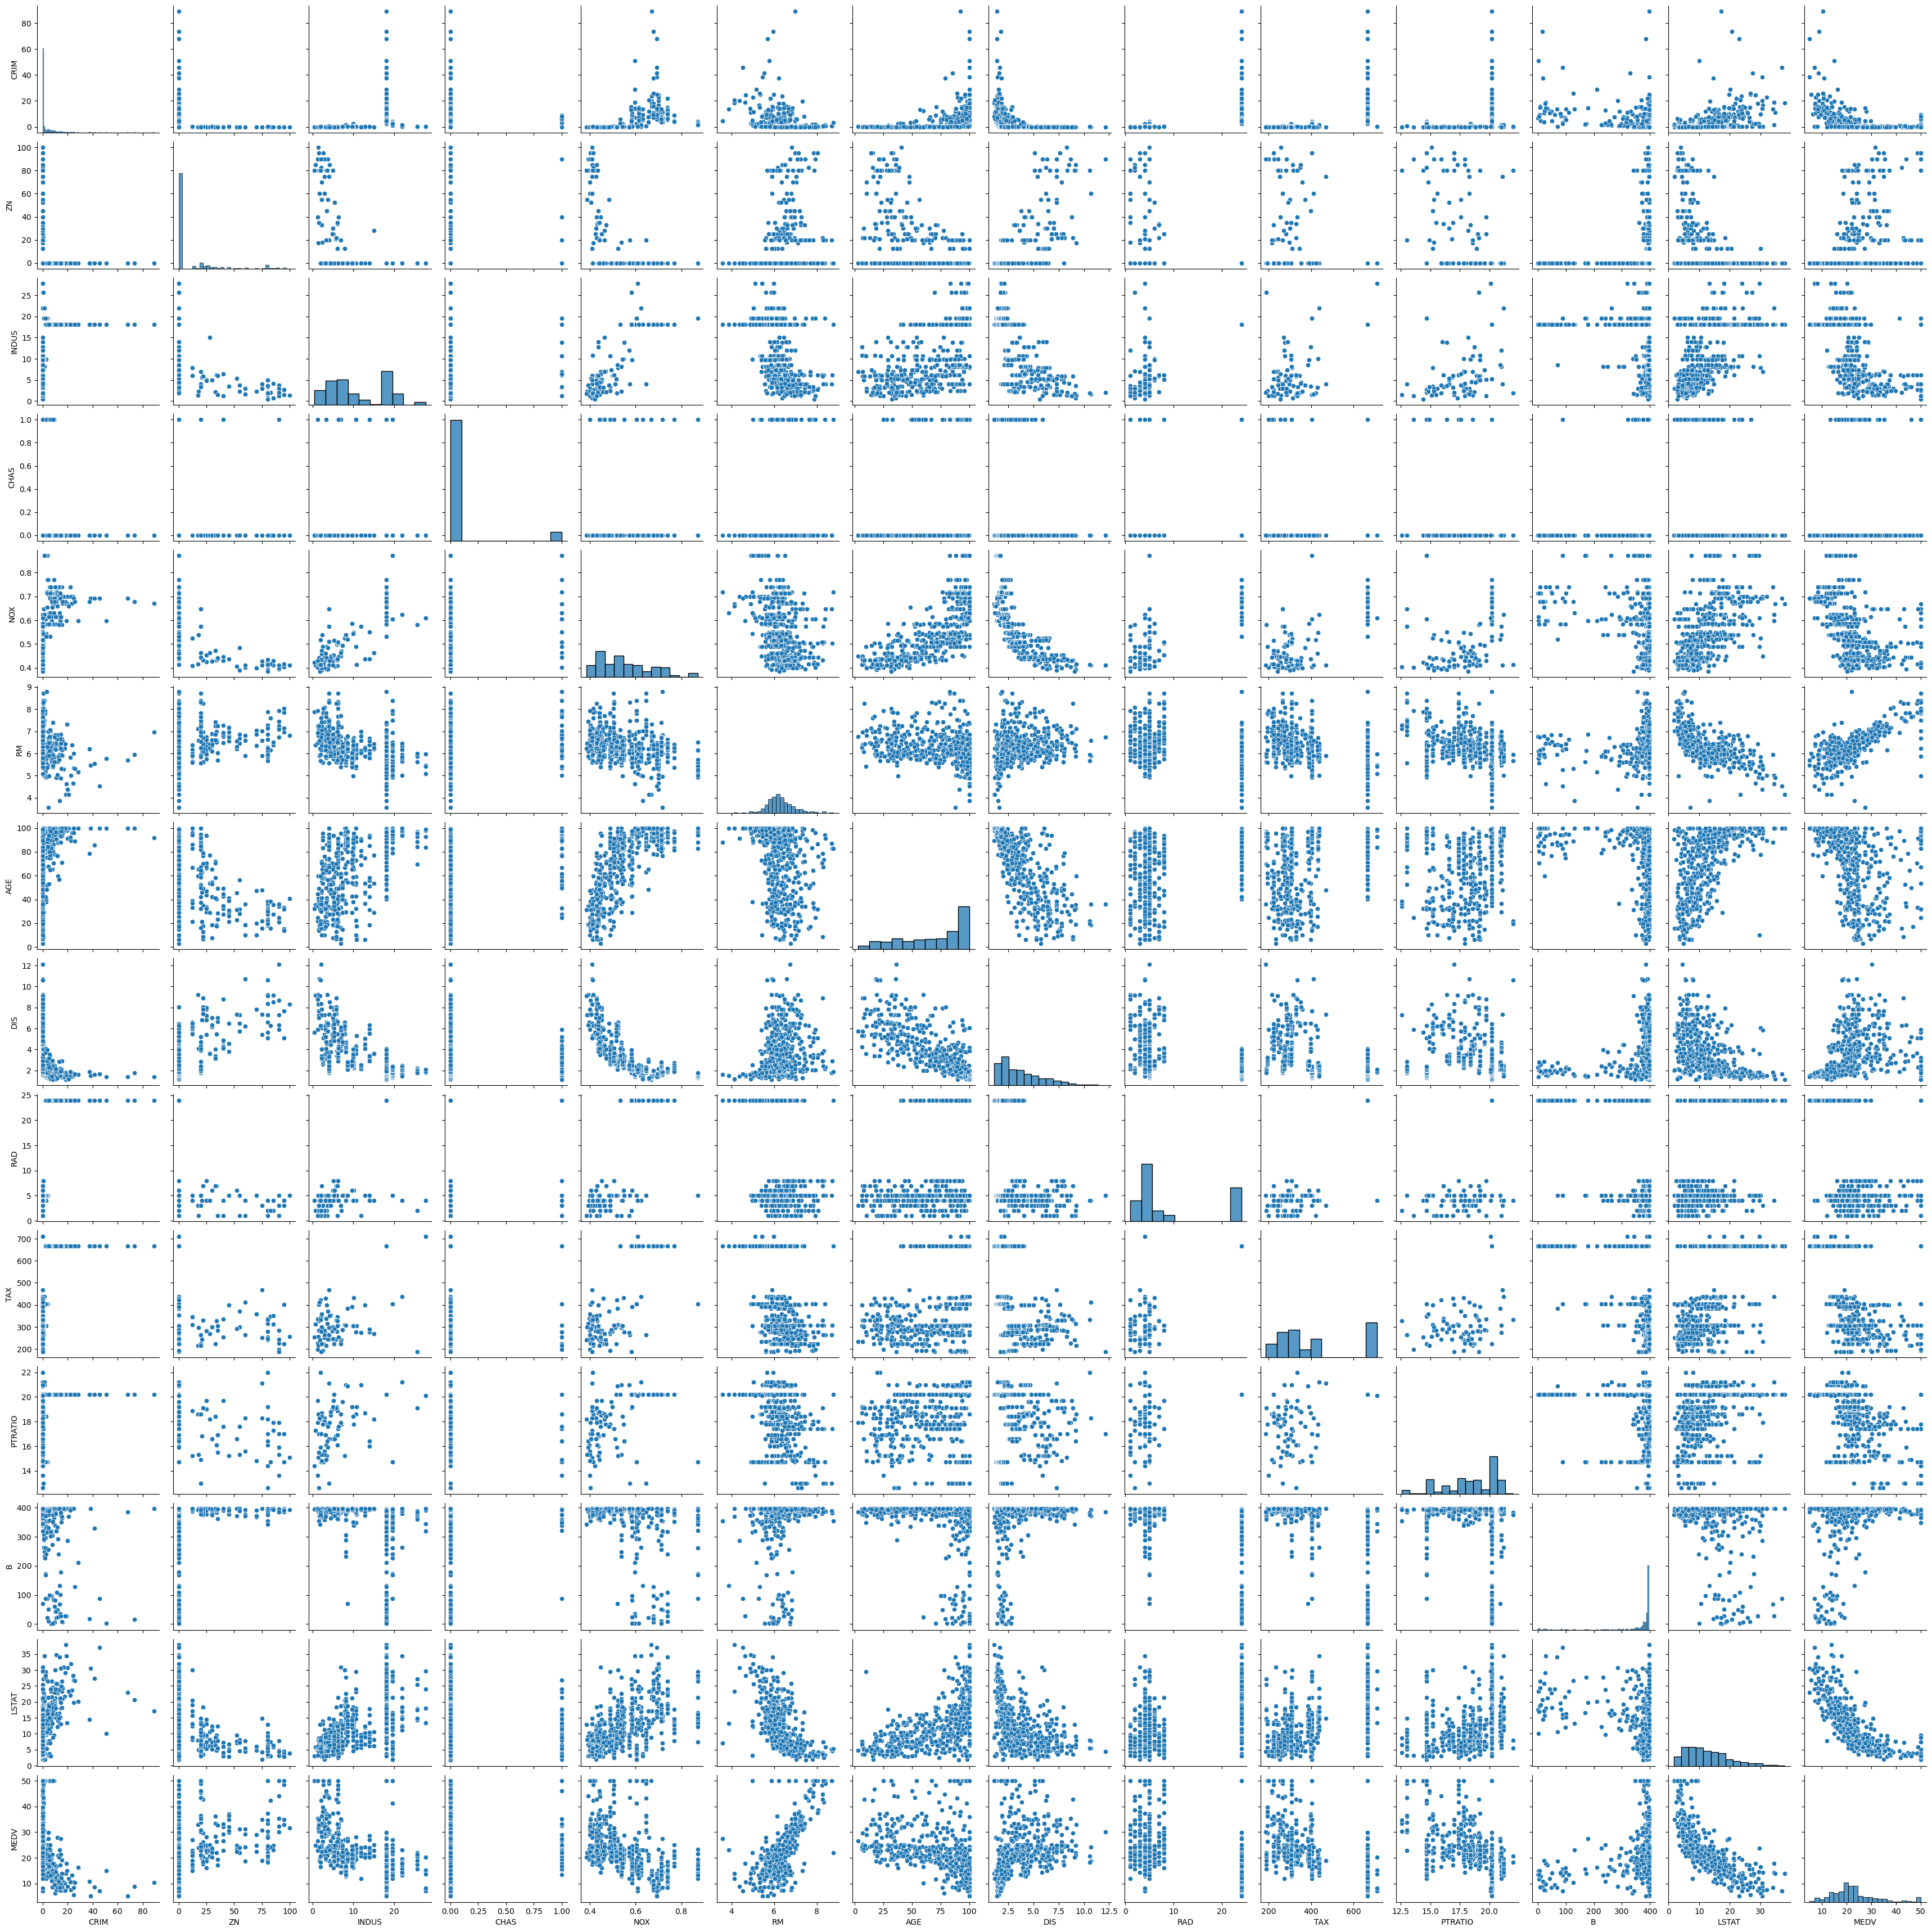

In [10]:
# RELATIONSHIP: Pairplot to visualize relationships between features and the target variable
sns.pairplot(data) 
plt.show()

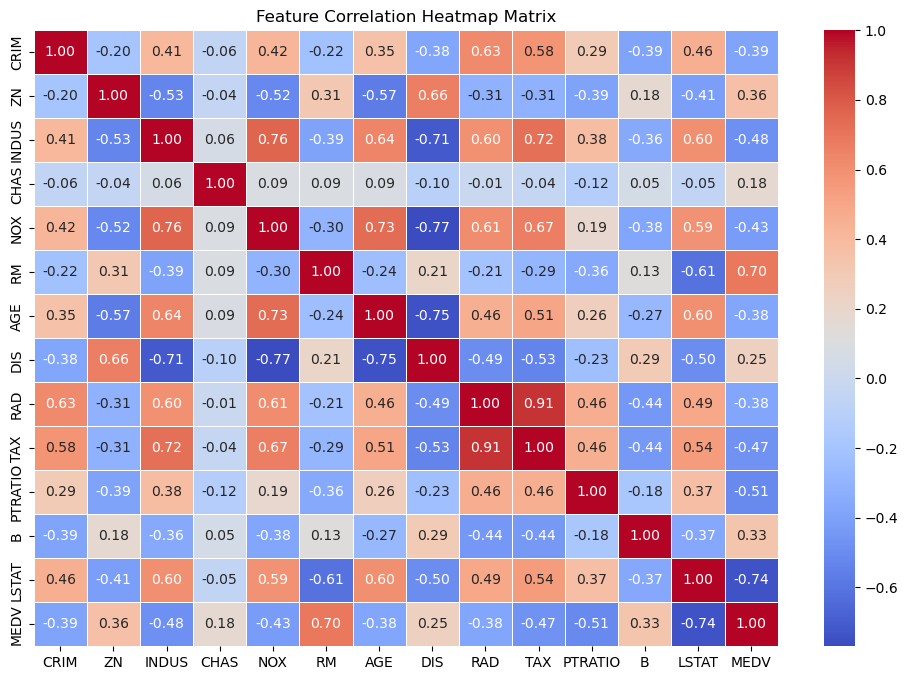

In [11]:
# 1.2 Visualize correlations between the input features and the target variable (MEDV).
# CORRELATION (using heatmap)
corr_matrix = data.corr() #calculate the correlation matrix
plt.figure(figsize=(12, 8)) #set figure size
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5) #plot the heatmap
plt.title("Feature Correlation Heatmap Matrix") #label
plt.show()

# Based on the heatmap: the most relevant features for MEDV are RM, LSTAT, PTRATIO, INDUS, AND ZN

In [12]:
# 1.3 Identify and handle any missing data or outliers.

# HANDLE MISSING VALUES
# check if there is any null values on the features of the dataset
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

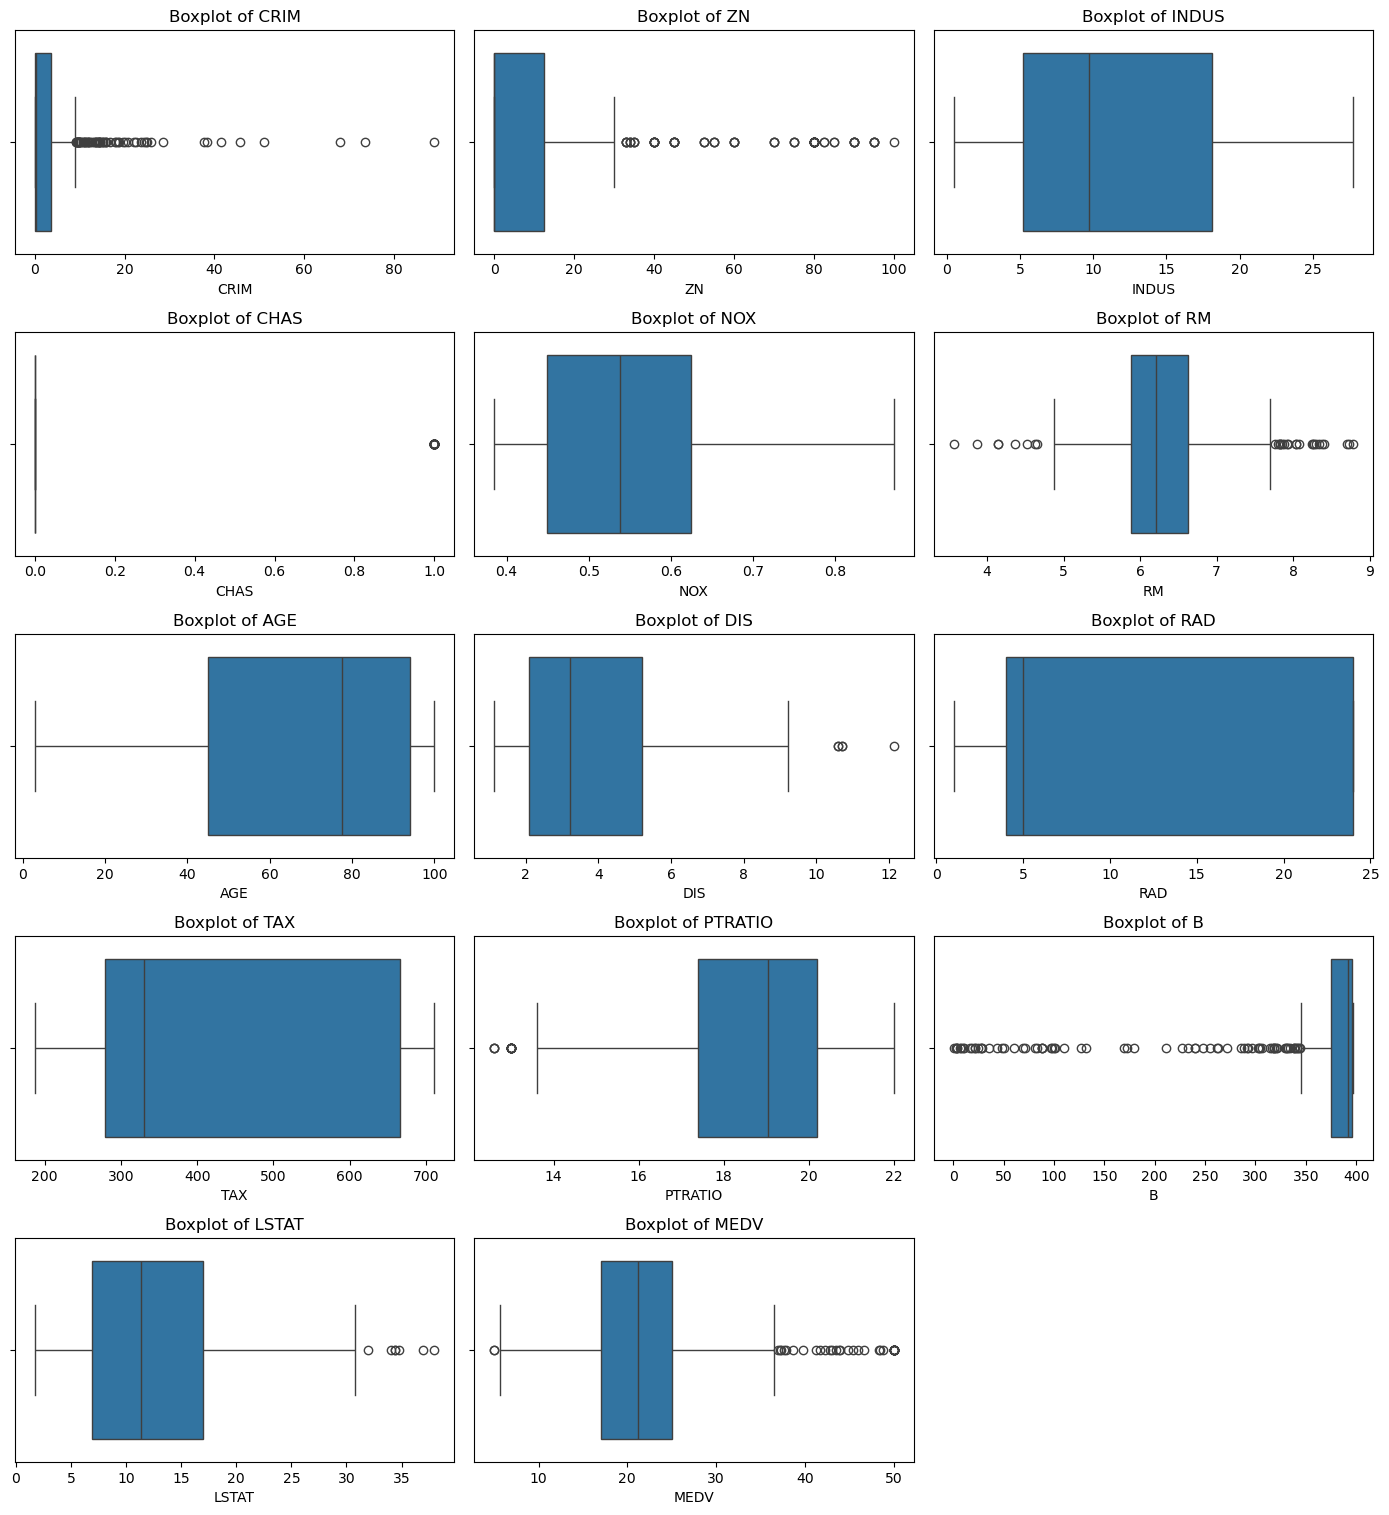

In [13]:
#HANDLE OUTLIERS
# Outlier Detection using Boxplots
plt.figure(figsize=(14, len(data.columns) * 3)) # Set figure size based on the number of features 
for idx, feature in enumerate(data.columns, 1):
    plt.subplot(len(data.columns), 3, idx)   # Creating a subplot grid (3 subplot in 1 row)
    sns.boxplot(x=data[feature])  # Create the boxplot
    plt.title(f"Boxplot of {feature}")  # label
plt.tight_layout()  
plt.show()  

In [14]:
# REMOVE OUTLIERS
data_without_chas = data.drop(columns=['CHAS']) #excluded since it's categorical and doesn't need outlier treatment

# Calculate the Z-scores only for the numerical data
z_scores = np.abs(stats.zscore(data_without_chas)) 
outliers = np.where(z_scores > 3)  # identify outliers

outlier_mask = (z_scores <= 3).all(axis=1) # Create a mask where all Z-scores <= 3 are marked as True

data_cleaned = data[outlier_mask]  # filter the original dataset

print(f"Original dataset size: {data.shape[0]}")
print(f"Cleaned dataset size: {data_cleaned.shape[0]}")
print(f"Number of outliers removed: {data.shape[0] - data_cleaned.shape[0]}")

Original dataset size: 506
Cleaned dataset size: 448
Number of outliers removed: 58


# OBJECTIVE 2: DATA PREPROCESSING

In [ ]:
# BASED ON THE CORRELATION HEATMAP, THE MOST RELEVANT FEATURES OF MEDV ARE RM, LSTAT, PTRATIO, INDUS, AND ZN
# so we sill use them for our model prediction to further identify the most relevant features of MEDV

# Declaring the input and target variable
X = data[['RM', 'LSTAT', 'PTRATIO', 'INDUS', 'ZN']]
y = data['MEDV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# 2.1 Apply appropriate scaling techniques to ensure the features are on a similar scale, which is crucial for linear models.
# SCALING
scaler = StandardScaler()
X_train[['RM', 'LSTAT', 'PTRATIO', 'INDUS', 'ZN']] = scaler.fit_transform(X_train[['RM', 'LSTAT', 'PTRATIO', 'INDUS', 'ZN']])
X_test[['RM', 'LSTAT', 'PTRATIO', 'INDUS', 'ZN']] = scaler.transform(X_test[['RM', 'LSTAT', 'PTRATIO', 'INDUS', 'ZN']])

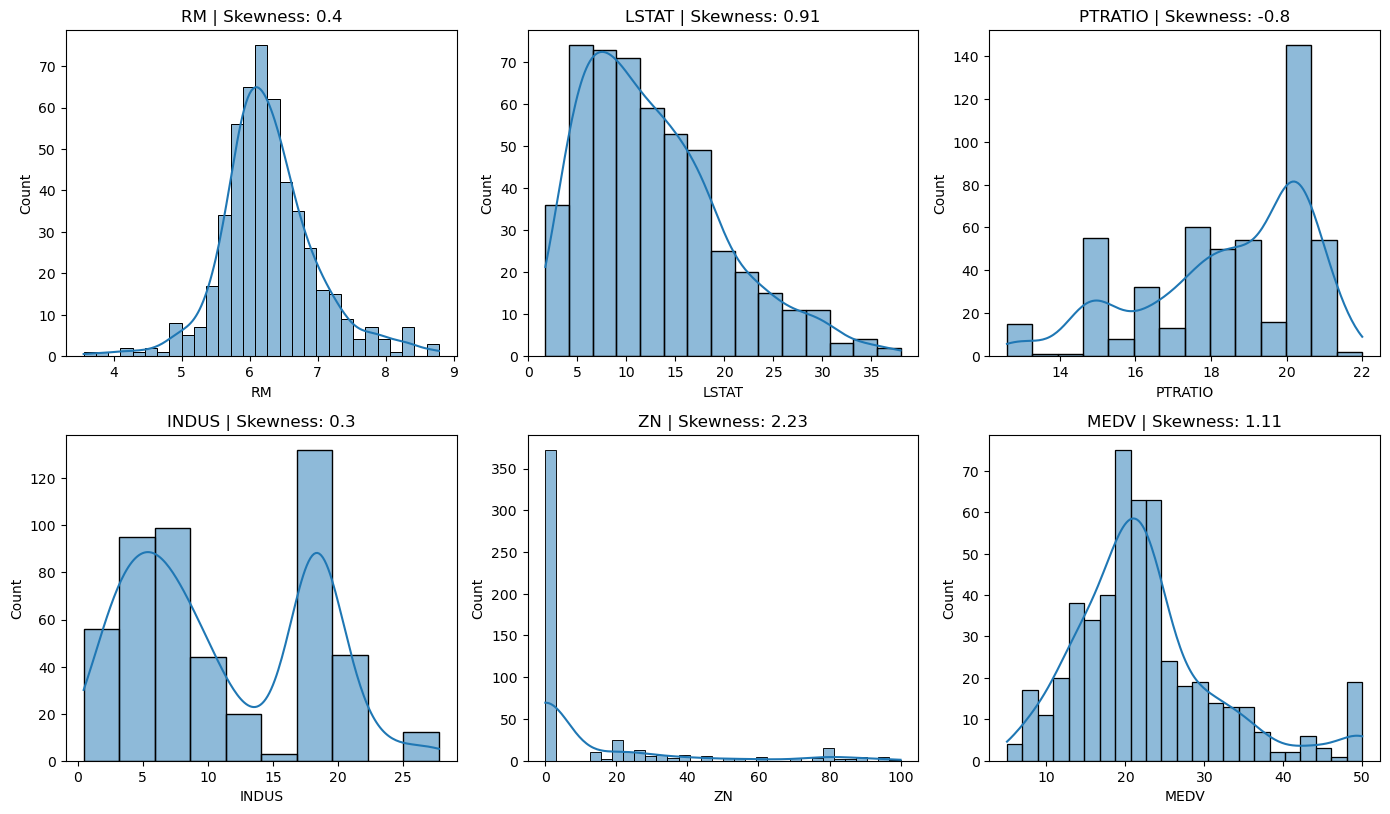

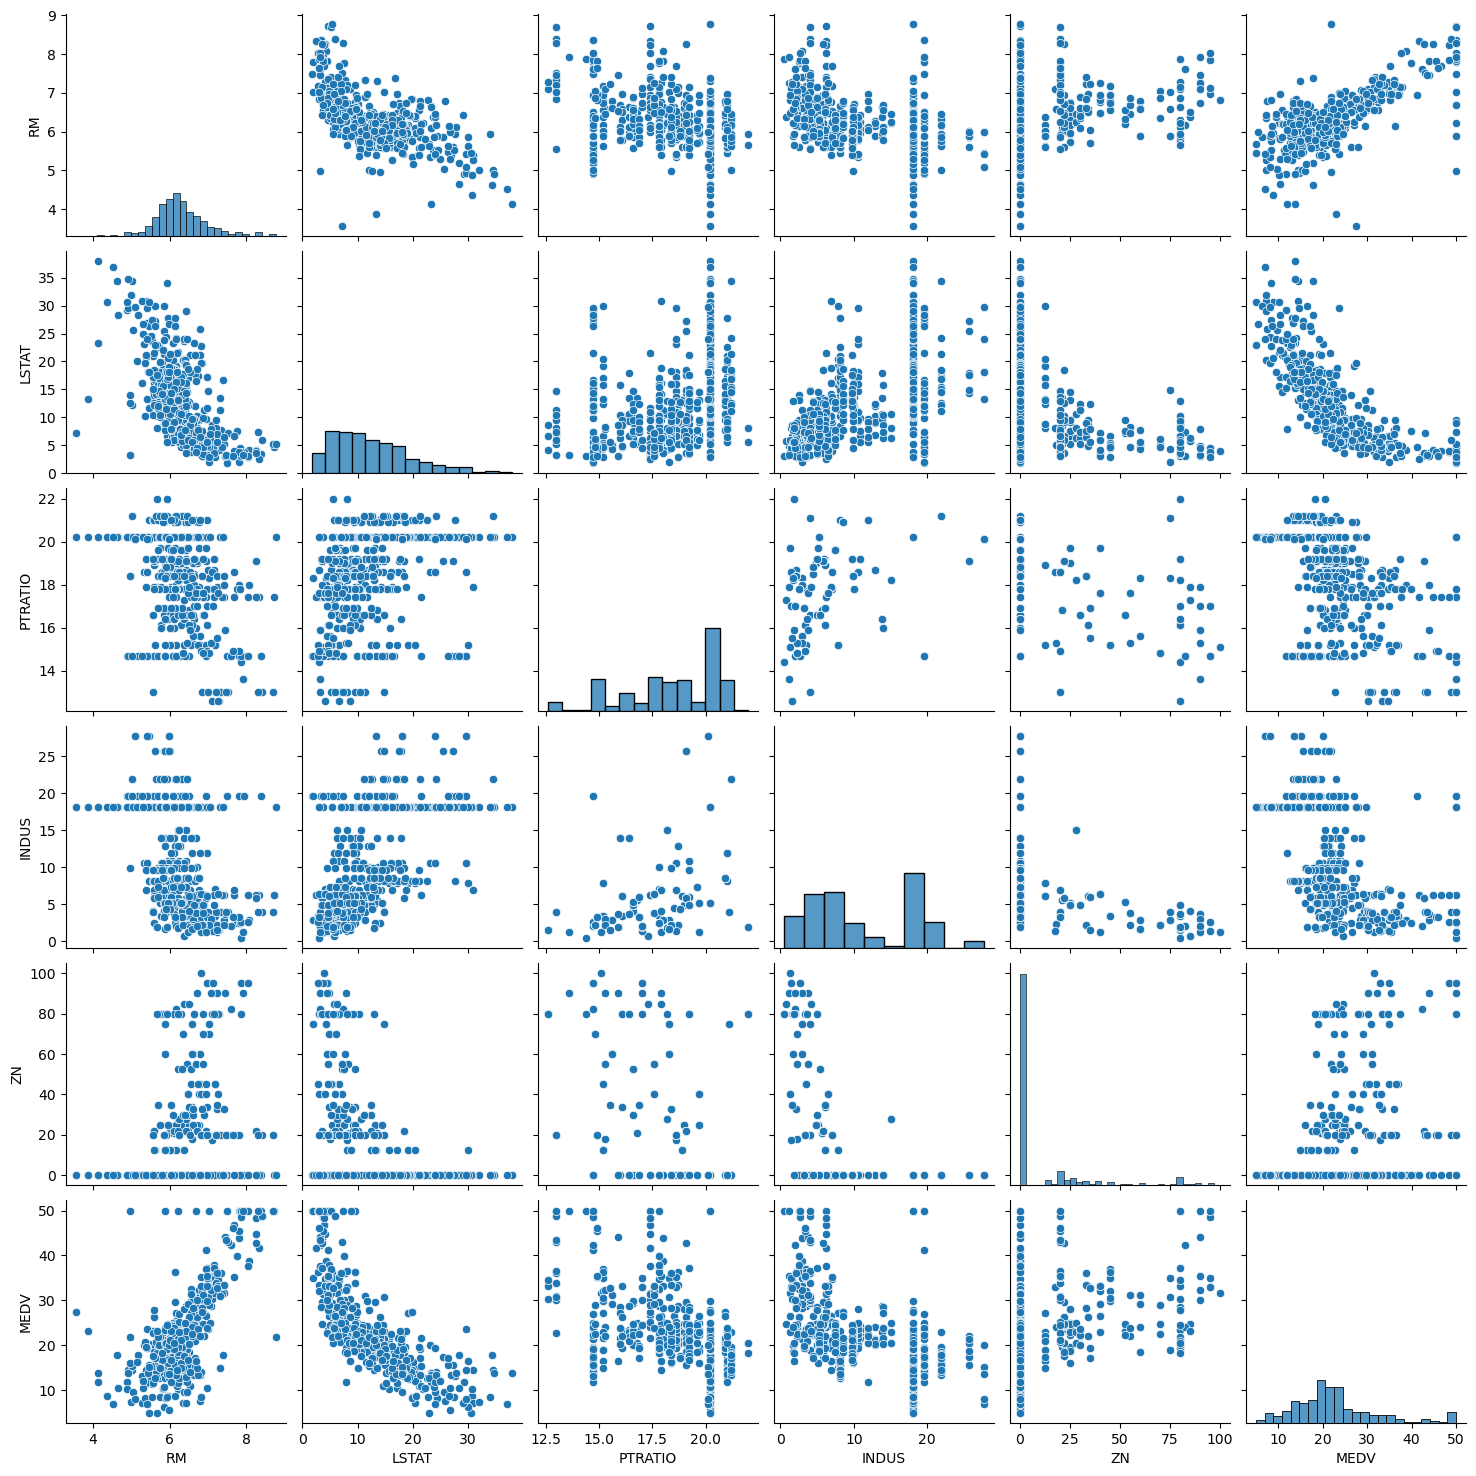

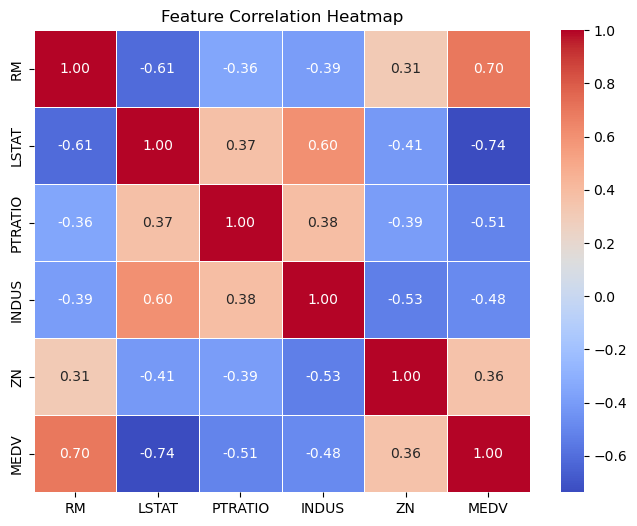

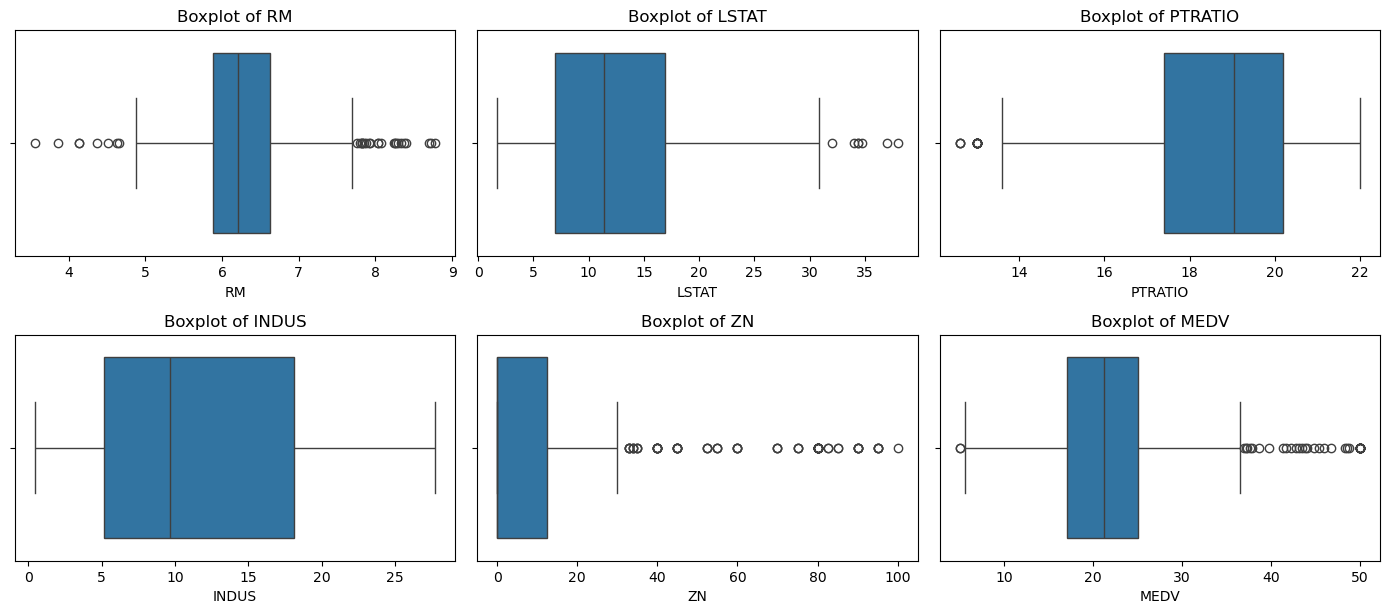

In [18]:
# TO BETTER VISUALIZE AGAIN THE SELECTED FEATURES (SAME AS EARLIER BUT NORE MORE SPECIFIC BESED ON THE NEEDED VARIABLES)

# DATA DISTRIBUTION: Univariate Analysis using Kernel Density Plot
selected_features =['RM', 'LSTAT', 'PTRATIO', 'INDUS', 'ZN', 'MEDV']

plt.figure(figsize=(14, len(selected_features) * 4)) 
for idx, feature in enumerate(selected_features, 1):  
    plt.subplot(len(selected_features), 3, idx) 
    sns.histplot(data[feature], kde=True)  
    plt.title(f"{feature} | Skewness: {round(data[feature].skew(), 2)}")  

plt.tight_layout()   
plt.show()

# RELATIONSHIP: Pairplot to visualize relationships between features and the target variable
sns.pairplot(data[selected_features]) 
plt.show()

# CORRELATION (using heatmap)
plt.figure(figsize=(8, 6)) 
sns.heatmap(data[selected_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# BOXPLOT
plt.figure(figsize=(14, len(selected_features) * 3)) 
for idx, feature in enumerate(selected_features, 1):
    plt.subplot(len(selected_features), 3, idx)   
    sns.boxplot(x=data[feature])  
    plt.title(f"Boxplot of {feature}") 
plt.tight_layout()  
plt.show()  

In [19]:
# 2.2 Encoding: Handle categorical variables (if any) using suitable encoding methods 

#NOTE: the dataset has no categorical variable, so skip

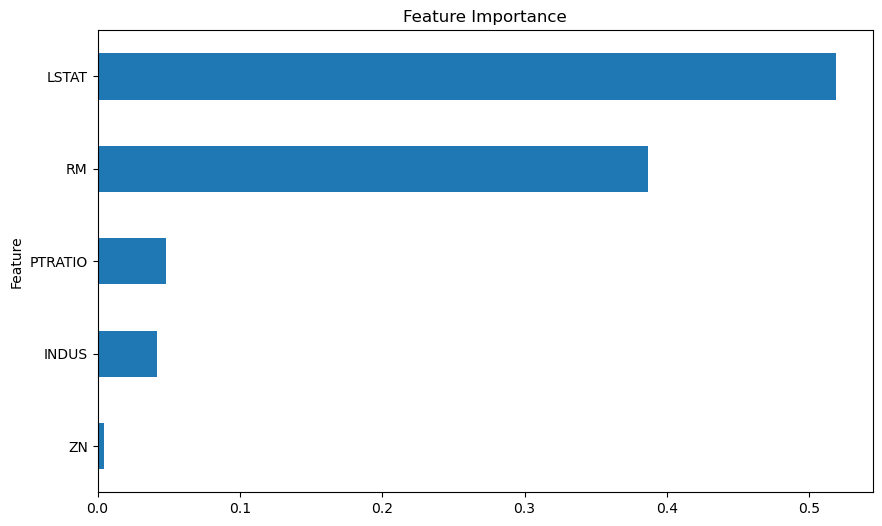

In [20]:
# TO CONFIRM IF THE RIGHT FEATURES ARE SELECTED FOR PREDICTION
# SECOND METHOD FOR FEATURE SELECTION (using random forest)

# 2.3 Feature Selection: Analyze feature importance and potentially reduce dimensionality by selecting relevant features
A = data[['RM', 'LSTAT', 'PTRATIO', 'INDUS', 'ZN']]  # All features except target variable
b = data['MEDV']  # Target variable

model = RandomForestRegressor(n_estimators=100, random_state=42) 
model.fit(A, b) # Train a Random Forest model
feature_importance = model.feature_importances_
importance_df = pd.DataFrame({ # Create a df for feature importances
    'Feature': A.columns,
    'Importance': feature_importance
})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

#Visualize
importance_df.plot(kind='barh', x='Feature', y='Importance', figsize=(10, 6), legend=False)
plt.title("Feature Importance")
plt.show()

# NOTE: according here, the least important feature among our selected training and testing features is the ZN
# We will confirm if this is true later after the prediction of different models and comparison of its coefficients

# OBJECTIVE 3: MODEL IMPLEMENTATION

In [22]:
# 3.1 Start with a simple linear regression model to establish a baseline performance.
# BASELINE MODEL: Simple Linear Regression Model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train) # Train the model
y_train_pred_linear = linear_reg.predict(X_train) # Predict
y_test_pred_linear = linear_reg.predict(X_test) # Predict

In [23]:
# 3.2 ADVANCED MODELS: Implement Ridge Regression, Lasso Regression, and Elastic Net to improve the model by addressing overfitting and underfitting issues.
# 3.3 HYPERPARAMETER TUNING: Experiment with different hyperparameters (e.g. regularization strength) to optimize model performance.

# RIDGE REGRESSION with Hyperparameter Tuning #1 (Manual)
ridge1 = Ridge(alpha=0.001)
ridge1.fit(X_train, y_train)  # Train the model
y_train_pred_ridge1 = ridge1.predict(X_train)  # Predict on training data
y_test_pred_ridge1 = ridge1.predict(X_test)  # Predict on test data
mse_ridge1 = mean_squared_error(y_test, y_test_pred_ridge1)
print(f"HYPER TUNING (Ridge) #1 MSE: {mse_ridge1}")

HYPER TUNING (Ridge) #1 MSE: 28.332862866850643


In [24]:
# RIDGE REGRESSION with Hyperparameter Tuning #2 (Manual)
ridge2 = Ridge(alpha=0.01)
ridge2.fit(X_train, y_train)  # Train the model
y_train_pred_ridge2 = ridge2.predict(X_train)  # Predict on training data
y_test_pred_ridge2 = ridge2.predict(X_test)  # Predict on test data
mse_ridge2 = mean_squared_error(y_test, y_test_pred_ridge2)
print(f"HYPER TUNING (Ridge) #2 MSE: {mse_ridge2}")

HYPER TUNING (Ridge) #2 MSE: 28.33256633945383


In [25]:
# RIDGE REGRESSION with Hyperparameter Tuning #3 (Manual)
ridge3 = Ridge(alpha=1.0)
ridge3.fit(X_train, y_train)  # Train the model
y_train_pred_ridge3 = ridge3.predict(X_train)  # Predict on training data
y_test_pred_ridge3 = ridge3.predict(X_test)  # Predict on test data
mse_ridge3 = mean_squared_error(y_test, y_test_pred_ridge3)
print(f"HYPER TUNING (Ridge) #3 MSE: {mse_ridge3}")

HYPER TUNING (Ridge) #3 MSE: 28.30020538463012


Best Alpha for Ridge is: 1.0


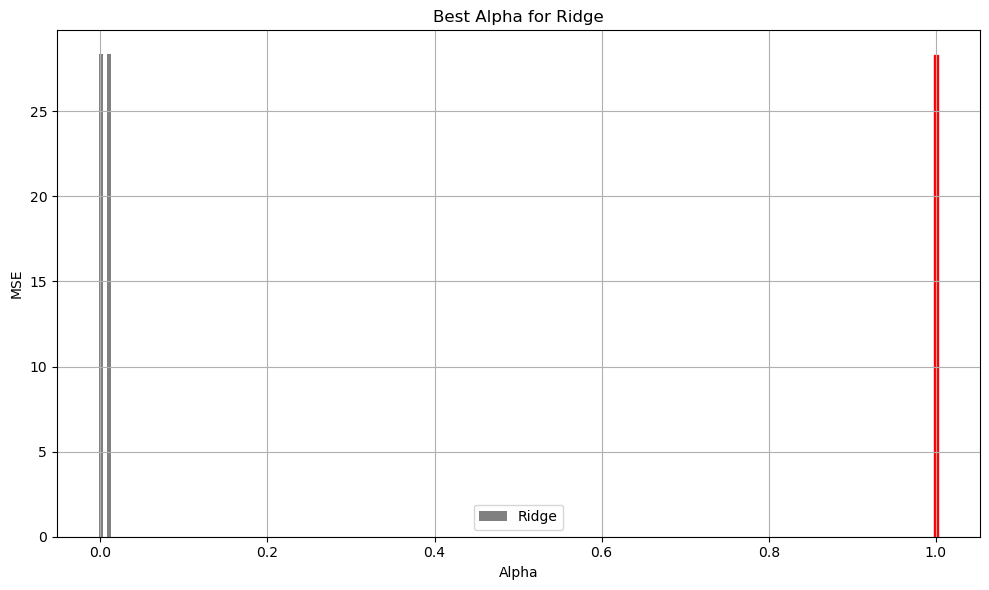

In [26]:
#PLOTTING THE HYPERTUNING OF RIDGE REGRESSION TO IDENTIFY THE BEST ALPHA TO USE
mse_ridge = [mse_ridge1, mse_ridge2, mse_ridge3]  
alpha_values_ridge = [0.001, 0.01, 1.0]  # The alpha values you used for tuning

best_index_ridge = np.argmin(mse_ridge) # Identify the best alpha (lowest MSE) for Ridge
print(f"Best Alpha for Ridge is: {alpha_values_ridge[best_index_ridge]}")

plt.figure(figsize=(10, 6))
bars_ridge = plt.bar(alpha_values_ridge, mse_ridge, width=0.005, color='grey', label='Ridge')
bars_ridge[best_index_ridge].set_color('red')  # Change color of the best alpha

plt.title('Best Alpha for Ridge')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [27]:
# LASSO REGRESSION with Hyperparameter Tuning #1 (Manual)
lasso1 = Lasso(alpha=0.001)
lasso1.fit(X_train, y_train)  # Train the model
y_train_pred_lasso1 = lasso1.predict(X_train)  # Predict on training data
y_test_pred_lasso1 = lasso1.predict(X_test)  # Predict on test data
mse_lasso1 = mean_squared_error(y_test, y_test_pred_lasso1)
print(f"HYPER TUNING (Lasso) #1 MSE: {mse_lasso1}")

HYPER TUNING (Lasso) #1 MSE: 28.326292600931346


In [28]:
# LASSO REGRESSION with Hyperparameter Tuning #2 (Manual)
lasso2 = Lasso(alpha=0.01)
lasso2.fit(X_train, y_train)  # Train the model
y_train_pred_lasso2 = lasso2.predict(X_train)  # Predict on training data
y_test_pred_lasso2 = lasso2.predict(X_test)  # Predict on test data
mse_lasso2 = mean_squared_error(y_test, y_test_pred_lasso2)
print(f"HYPER TUNING (Lasso) #2 MSE: {mse_lasso2}")

HYPER TUNING (Lasso) #2 MSE: 28.2664527679436


In [29]:
# LASSO REGRESSION with Hyperparameter Tuning #3 (Manual)
lasso3 = Lasso(alpha=1.0)
lasso3.fit(X_train, y_train)  # Train the model
y_train_pred_lasso3 = lasso3.predict(X_train)  # Predict on training data
y_test_pred_lasso3 = lasso3.predict(X_test)  # Predict on test data
mse_lasso3 = mean_squared_error(y_test, y_test_pred_lasso3)
print(f"HYPER TUNING (Lasso) #3 MSE: {mse_lasso3}")

HYPER TUNING (Lasso) #3 MSE: 27.324373812036537


Best Alpha for Lasso is: 1.0


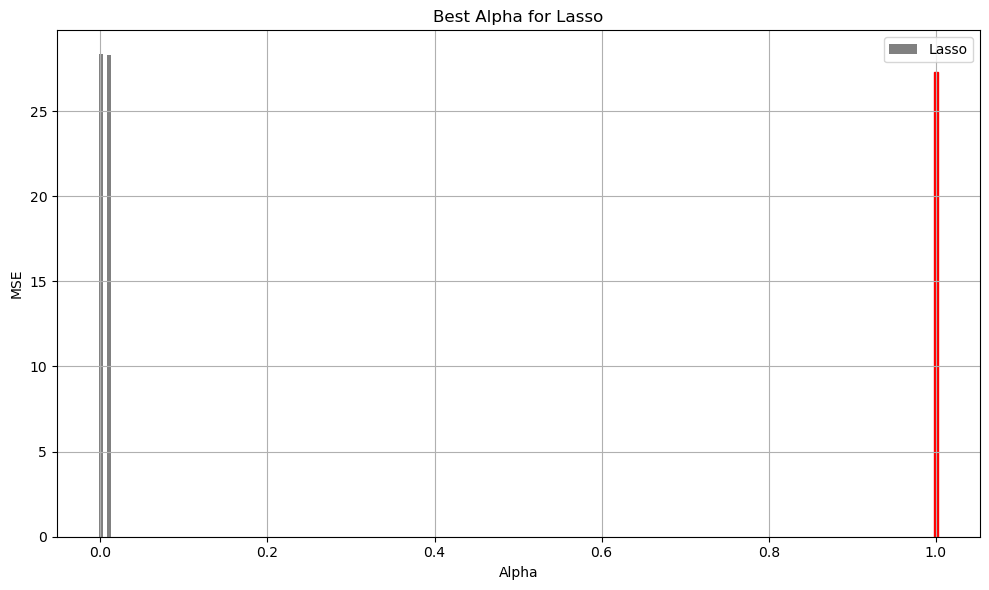

In [30]:
#PLOTTING THE HYPERTUNING OF LASSO REGRESSION TO IDENTIFY THE BEST ALPHA TO USE
mse_lasso = [mse_lasso1, mse_lasso2, mse_lasso3]  
alpha_values_lasso = [0.001, 0.01, 1.0]  # The alpha values you used for tuning

best_index_lasso = np.argmin(mse_lasso) # Identify the best alpha (lowest MSE) for Lasso
print(f"Best Alpha for Lasso is: {alpha_values_lasso[best_index_lasso]}")

# Plot Lasso MSE
plt.figure(figsize=(10, 6))
bars_lasso = plt.bar(alpha_values_lasso, mse_lasso, width=0.005, color='grey', label='Lasso')
bars_lasso[best_index_lasso].set_color('red')  # Change color of the best alpha

plt.title('Best Alpha for Lasso')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [31]:
# ELASTICNET REGRESSION with Hyperparameter Tuning #1 (Manual)
elasticnet1 = ElasticNet(alpha=0.001, l1_ratio=0.5)
elasticnet1.fit(X_train, y_train)  # Train the model
y_train_pred_en1 = elasticnet1.predict(X_train)  # Predict on training data
y_test_pred_en1 = elasticnet1.predict(X_test)  # Predict on test data
mse_en1 = mean_squared_error(y_test, y_test_pred_en1)
print(f"HYPER TUNING (ElasticNet) #1 MSE: {mse_en1}")

HYPER TUNING (ElasticNet) #1 MSE: 28.32297117854003


In [32]:
# ELASTICNET REGRESSION with Hyperparameter Tuning #2 (Manual)
elasticnet2 = ElasticNet(alpha=0.01, l1_ratio=0.5)
elasticnet2.fit(X_train, y_train)  # Train the model
y_train_pred_en2 = elasticnet2.predict(X_train)  # Predict on training data
y_test_pred_en2 = elasticnet2.predict(X_test)  # Predict on test data
mse_en2 = mean_squared_error(y_test, y_test_pred_en2)
print(f"HYPER TUNING (ElasticNet) #2 MSE: {mse_en2}")

HYPER TUNING (ElasticNet) #2 MSE: 28.234480956773314


In [33]:
# ELASTICNET REGRESSION with Hyperparameter Tuning #3 (Manual)
elasticnet3 = ElasticNet(alpha=1.0, l1_ratio=0.5)
elasticnet3.fit(X_train, y_train)  # Train the model
y_train_pred_en3 = elasticnet3.predict(X_train)  # Predict on training data
y_test_pred_en3 = elasticnet3.predict(X_test)  # Predict on test data
mse_en3 = mean_squared_error(y_test, y_test_pred_en3)
print(f"HYPER TUNING (ElasticNet) #3 MSE: {mse_en3}")

HYPER TUNING (ElasticNet) #3 MSE: 28.115584803598704


Best Alpha for Elastic Net is: 1.0


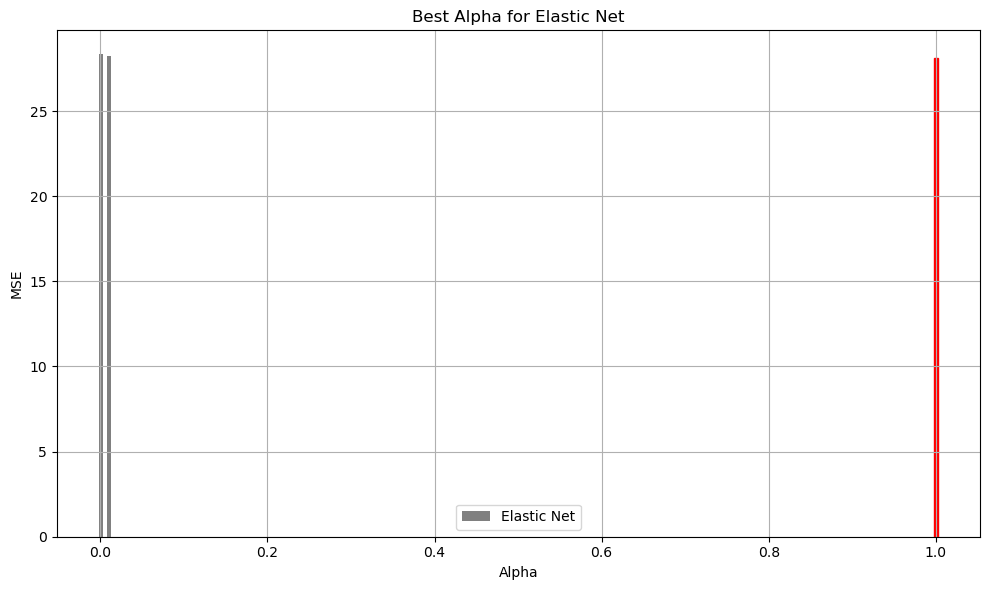

In [34]:
#PLOTTING THE HYPERTUNING OF ELASTIC NET TO IDENTIFY THE BEST ALPHA TO USE
mse_elastic = [mse_en1, mse_en2, mse_en3]  
alpha_values_elastic = [0.001, 0.01, 1.0]  

best_index_elastic = np.argmin(mse_elastic) # Identify the best alpha (lowest MSE)
print(f"Best Alpha for Elastic Net is: {alpha_values_elastic[best_index_elastic]}")

plt.figure(figsize=(10, 6))
bars = plt.bar(alpha_values_elastic, mse_elastic, width=0.005, color='grey', label='Elastic Net')
bars[best_index_elastic].set_color('red') # Change color of the best alpha

plt.title('Best Alpha for Elastic Net')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# OBJECTIVE 4: MODEL EVALUATION 

In [36]:
# 4.1 Evaluate the models using metrics such as Mean Squared Error (MSE), R-squared (R²), and Root Mean Squared Error (RMSE).

# EVALUATE LINEAR REGRESSION
mse_train_linear = mean_squared_error(y_train, y_train_pred_linear)
mse_test_linear = mean_squared_error(y_test, y_test_pred_linear)

r2_train_linear = r2_score(y_train, y_train_pred_linear)
r2_test_linear = r2_score(y_test, y_test_pred_linear)

rmse_train_linear = np.sqrt(mse_train_linear)
rmse_test_linear = np.sqrt(mse_test_linear)

print("--- LINEAR REGRESSION PERFORMANCE ---")
print(f"Train MSE: {mse_train_linear}, Test MSE: {mse_test_linear}")
print(f"Train R²: {r2_train_linear}, Test R²: {r2_test_linear}")
print(f"Train RMSE: {rmse_train_linear}, Test RMSE: {rmse_test_linear}")

--- LINEAR REGRESSION PERFORMANCE ---
Train MSE: 27.004761244035276, Test MSE: 28.332895816953418
Train R²: 0.6891481160797989, Test R²: 0.6136446996739306
Train RMSE: 5.196610553431465, Test RMSE: 5.322865376557387


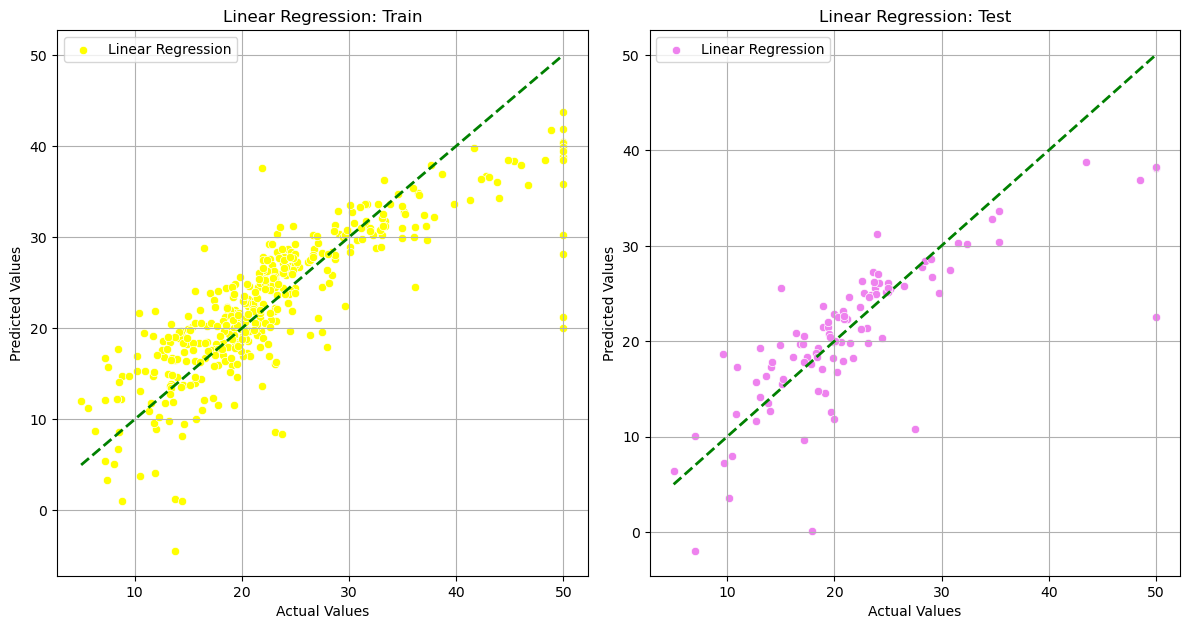

In [37]:
# Plotting the predictions vs actual values
plt.figure(figsize=(12, 12))

# Linear Regression: Train
plt.subplot(2, 2, 1)
sns.scatterplot(x=y_train, y=y_train_pred_linear, color="yellow", label='Linear Regression')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--', lw=2, color='green')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.title('Linear Regression: Train')

# Linear Regression: Test
plt.subplot(2, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred_linear, color="violet", label='Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=2, color='green')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.title('Linear Regression: Test')

plt.tight_layout()
plt.show()


In [38]:
# EVALUATE RIDGE REGRESSION
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge3)
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge3)

r2_train_ridge = r2_score(y_train, y_train_pred_ridge3)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge3)

rmse_train_ridge = np.sqrt(mse_train_ridge)
rmse_test_ridge = np.sqrt(mse_test_ridge)

print("--- RIDGE REGRESSION PERFORMANCE ---")
print(f"Train MSE: {mse_train_ridge}, Test MSE: {mse_test_ridge}")
print(f"Train R²: {r2_train_ridge}, Test R²: {r2_test_ridge}")
print(f"Train RMSE: {rmse_train_ridge}, Test RMSE: {rmse_test_ridge}")

--- RIDGE REGRESSION PERFORMANCE ---
Train MSE: 27.004956950155922, Test MSE: 28.30020538463012
Train R²: 0.6891458633060843, Test R²: 0.6140904755621299
Train RMSE: 5.196629383567383, Test RMSE: 5.319793735158359


Text(0.5, 1.0, 'Ridge Regression: Test')

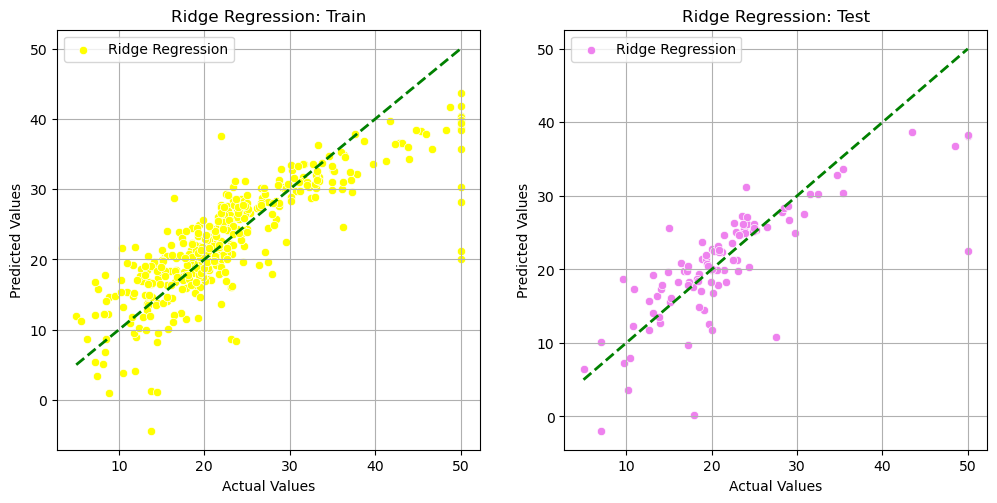

In [39]:
# Plotting the predictions vs actual values
plt.figure(figsize=(12, 12))

# Ridge: Train
plt.subplot(2, 2, 1)
sns.scatterplot(x=y_train, y=y_train_pred_ridge3, color="yellow", label='Ridge Regression')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--', lw=2, color='green')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.title('Ridge Regression: Train')

# Ridge: Test
plt.subplot(2, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred_ridge3, color="violet", label='Ridge Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=2, color='green')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.title('Ridge Regression: Test')

In [40]:
# EVALUATE LASSO REGRESSION
mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso3)
mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso3)

r2_train_lasso = r2_score(y_train, y_train_pred_lasso3)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso3)

rmse_train_lasso = np.sqrt(mse_train_lasso)
rmse_test_lasso = np.sqrt(mse_test_lasso)

print("--- LASSO REGRESSION PERFORMANCE ---")
print(f"Train MSE: {mse_train_lasso}, Test MSE: {mse_test_lasso}")
print(f"Train R²: {r2_train_lasso}, Test R²: {r2_test_lasso}")
print(f"Train RMSE: {rmse_train_lasso}, Test RMSE: {rmse_test_lasso}")

--- LASSO REGRESSION PERFORMANCE ---
Train MSE: 28.85480815091015, Test MSE: 27.324373812036537
Train R²: 0.6678522208431832, Test R²: 0.6273971881104272
Train RMSE: 5.371667166803072, Test RMSE: 5.227272119570258


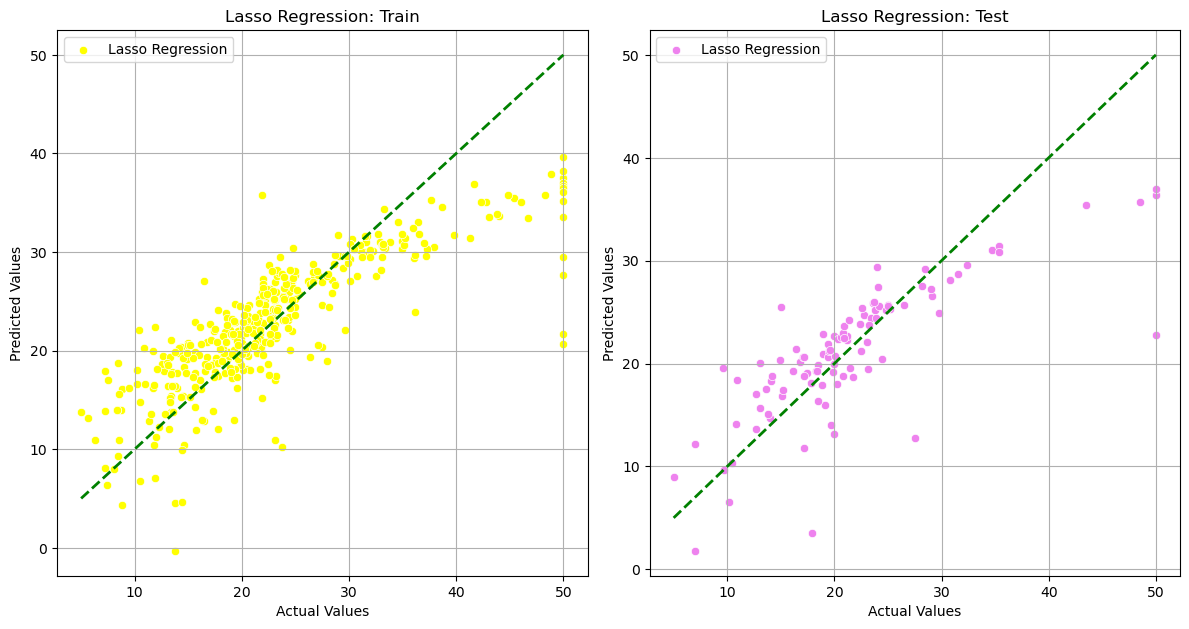

In [41]:
# Plotting the predictions vs actual values
plt.figure(figsize=(12, 12))

# Lasso: Train
plt.subplot(2, 2, 1)
sns.scatterplot(x=y_train, y=y_train_pred_lasso3, color="yellow", label='Lasso Regression')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--', lw=2, color='green')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.title('Lasso Regression: Train')

# Lasso: Test
plt.subplot(2, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred_lasso3, color="violet", label='Lasso Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=2, color='green')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.title('Lasso Regression: Test')

plt.tight_layout()
plt.show()

In [42]:
# EVALUATE ELASTIC NET REGRESSION
mse_train_elastic = mean_squared_error(y_train, y_train_pred_en3)
mse_test_elastic = mean_squared_error(y_test, y_test_pred_en3)

r2_train_elastic = r2_score(y_train, y_train_pred_en3)
r2_test_elastic = r2_score(y_test, y_test_pred_en3)  
rmse_train_elastic = np.sqrt(mse_train_elastic)
rmse_test_elastic = np.sqrt(mse_test_elastic)

print("--- ELASTIC NET REGRESSION PERFORMANCE ---")
print(f"Train MSE: {mse_train_elastic}, Test MSE: {mse_test_elastic}")
print(f"Train R²: {r2_train_elastic}, Test R²: {r2_test_elastic}")
print(f"Train RMSE: {rmse_train_elastic}, Test RMSE: {rmse_test_elastic}")


--- ELASTIC NET REGRESSION PERFORMANCE ---
Train MSE: 31.743361577280872, Test MSE: 28.115584803598704
Train R²: 0.6346020740902724, Test R²: 0.6166080134972423
Train RMSE: 5.634124739236865, Test RMSE: 5.3024131113671915


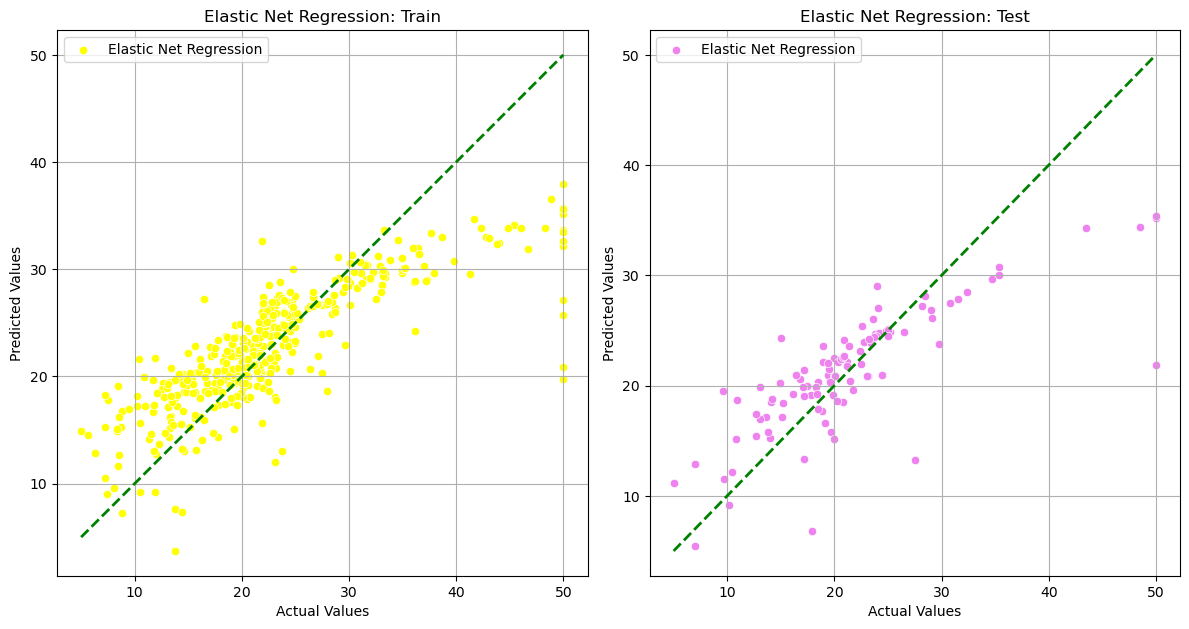

In [43]:
# Plotting the predictions vs actual values
plt.figure(figsize=(12, 12))

# Elastic Net: Train
plt.subplot(2, 2, 1)
sns.scatterplot(x=y_train, y=y_train_pred_en3, color="yellow", label='Elastic Net Regression')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--', lw=2, color='green')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.title('Elastic Net Regression: Train')

# Elastic Net: Test
plt.subplot(2, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred_en3, color="violet", label='Elastic Net Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=2, color='green')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.title('Elastic Net Regression: Test')

plt.tight_layout()
plt.show()

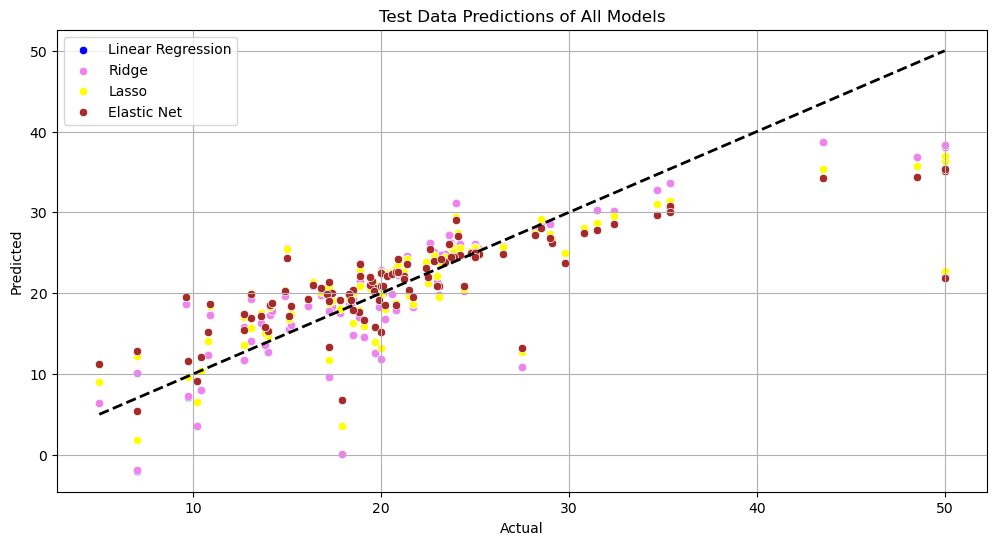

In [44]:
# Plotting the predictions vs actual values
plt.figure(figsize=(12, 6))

sns.scatterplot(x=y_test, y=y_test_pred_linear, label='Linear Regression', color='blue')
sns.scatterplot(x=y_test, y=y_test_pred_ridge3, label='Ridge', color='violet')
sns.scatterplot(x=y_test, y=y_test_pred_lasso3, label='Lasso', color='yellow')
sns.scatterplot(x=y_test, y=y_test_pred_en3, label='Elastic Net', color='brown')

# Identity line (Actual = Predicted)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data Predictions of All Models')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
# Define the function to check if the model is overfitting or underfitting 
def check_fitting(mse_train, mse_test, r2_train, r2_test, rmse_train, rmse_test, model_name):
    mse_diff = abs(mse_train - mse_test) / mse_train
    r2_diff = abs(r2_train - r2_test) / r2_train
    rmse_diff = abs(rmse_train - rmse_test) / rmse_train

    print(f"\n--- {model_name} Performance ---")
    print(f"Train MSE: {mse_train:.10f} | Test MSE: {mse_test:.10f}")
    print(f"Train R²: {r2_train:.10f} | Test R²: {r2_test:.10f}")
    print(f"Train RMSE: {rmse_train:.10f} | Test RMSE: {rmse_test:.10f}")
    
    # Check overfitting or underfitting
    if mse_diff > 0.1 and rmse_diff > 0.1 and mse_train < mse_test and r2_train > r2_test:
        print(f"\nResult: {model_name} might be overfitting.\n\n")
    elif mse_diff > 0.1 and rmse_diff > 0.1 and mse_train > mse_test and r2_train < r2_test:
        print(f"\nResult: {model_name} might be underfitting.\n\n")
    else:
        print(f"\nResult: {model_name} seems to be well-tuned.\n\n")

# Now check the fitting for each model (linear, ridge, lasso, elastic net)

print("\n--- MODEL PERFORMANCE CHECK ---")

# Linear Regression
check_fitting(mse_train_linear, mse_test_linear, r2_train_linear, r2_test_linear, rmse_train_linear, rmse_test_linear, "Linear Regression")

# Ridge Regression
check_fitting(mse_train_ridge, mse_test_ridge, r2_train_ridge, r2_test_ridge, rmse_train_ridge, rmse_test_ridge, "Ridge Regression")

# Lasso Regression
check_fitting(mse_train_lasso, mse_test_lasso, r2_train_lasso, r2_test_lasso, rmse_train_lasso, rmse_test_lasso, "Lasso Regression")

# Elastic Net Regression
check_fitting(mse_train_elastic, mse_test_elastic, r2_train_elastic, r2_test_elastic, rmse_train_elastic, rmse_test_elastic, "Elastic Net Regression")


--- MODEL PERFORMANCE CHECK ---

--- Linear Regression Performance ---
Train MSE: 27.0047612440 | Test MSE: 28.3328958170
Train R²: 0.6891481161 | Test R²: 0.6136446997
Train RMSE: 5.1966105534 | Test RMSE: 5.3228653766

Result: Linear Regression seems to be well-tuned.



--- Ridge Regression Performance ---
Train MSE: 27.0049569502 | Test MSE: 28.3002053846
Train R²: 0.6891458633 | Test R²: 0.6140904756
Train RMSE: 5.1966293836 | Test RMSE: 5.3197937352

Result: Ridge Regression seems to be well-tuned.



--- Lasso Regression Performance ---
Train MSE: 28.8548081509 | Test MSE: 27.3243738120
Train R²: 0.6678522208 | Test R²: 0.6273971881
Train RMSE: 5.3716671668 | Test RMSE: 5.2272721196

Result: Lasso Regression seems to be well-tuned.



--- Elastic Net Regression Performance ---
Train MSE: 31.7433615773 | Test MSE: 28.1155848036
Train R²: 0.6346020741 | Test R²: 0.6166080135
Train RMSE: 5.6341247392 | Test RMSE: 5.3024131114

Result: Elastic Net Regression seems to be well-tuned.

4.2 Compare the performance of different models and discuss the trade-offs

COMPARE:
- Linear Regression: The training results show an MSE of 27.00476 and an R² of 0.68915, meaning the model explains 68.9% of price variance. On the test set, MSE rises to 28.33290, and R² drops to 0.61365, indicating reduced generalization. RMSE values are 5.19661 (train) and 5.32287 (test), showing an average prediction error of 5.20 units. Scatter plots reveal a positive correlation but also prediction errors. The increased MSE and decreased R² suggest overfitting, which could be addressed with regularization.

- Ridge Regression: The Ridge Regression model behaves similarly in both the training and testing sets. The MSE rises from 27.00496 (train) to 28.30021 (test), while R² falls from 0.68915 (train) to 0.61409 (test), showing a drop in model performance on the testing set. The RMSE also rises slightly from 5.19662 (train) to 5.31979 (test), indicating a minor rise in accuracy of predictions.

- Lasso Regression The Lasso Regression model does significantly less on the test set. MSE decreased from 28.85480 (train) to 27.32437 (test), while R² decreased from 0.66785 (train) to 0.62740 (test). The RMSE is somewhat lower on the test set (5.22727) than on the training set (5.37167), indicating a tiny reduction in prediction error, but overall accuracy is declining.:

- Elastic Net:The Elastic Net Regression model functions inferior on the test set, with MSE dropping from 31.74336 (train) to 28.11558 (test), and R² lowering from 0.63460 (train) to 0.61661 (test). The RMSE increases marginally from 5.63412 (train) to 5.30241 (test), showing a minor decrease in incorrect prediction. 
 




TRADE-OFFS- Linear Regression: Simple and fast, with a moderate performance that’s well-tuned. While it performs similarly to Ridge, it’s not as accurate as Lasso, especially on the test set, where it shows a slight performance drop.

- Ridge Regression: Handles overfitting by reducing coefficients without eliminating features. It performs similarly to Linear Regression but provides better generalization, though it still doesn’t outperform Lasso in predictive accuracy.

- Lasso Regression: Excellent at eliminating irrelevant features and simplifying the model while maintaining high accuracy. It performs well overall, but the slight drop in performance on the test set indicates some overfitting.

- Elastic Net: A combination of Ridge and Lasso, it works well when features are correlated but did not outperform the other models in this case. It’s still well-tuned, but its predictive accuracy is somewhat limited compared to Lasso and Ridge.cenario.

# OBJECTIVE 5: ANALYSIS AND INTERPRETATION

In [48]:
# 5.1 Interpret the coefficients of the linear models to understand the impact of each feature on the target variable.

features = ['RM', 'LSTAT', 'PTRATIO', 'INDUS', 'ZN']

# LINEAR REGRESSION COEFFICIENTS
print("Linear Regression Coefficients:")
for feature, coef in zip(features, linear_reg.coef_):
    print(f"{feature}: {coef}")

# RIDGE REGRESSION COEFFICIENTS
print("\nRidge Regression Coefficients:")
for feature, coef in zip(features, ridge3.coef_): 
    print(f"{feature}: {coef}")

# LASSO REGRESSION COEFFICIENTS
print("\nLasso Regression Coefficients:")
for feature, coef in zip(features, lasso3.coef_): 
    print(f"{feature}: {coef}")

# ELASTIC NET COEFFICIENTS
print("\nElastic Net Coefficients:")
for feature, coef in zip(features, elasticnet3.coef_): 
    print(f"{feature}: {coef}")

Linear Regression Coefficients:
RM: 3.4918879035708468
LSTAT: -4.165740257283609
PTRATIO: -2.082580503715788
INDUS: -0.05588010021199982
ZN: -0.5666181021255209

Ridge Regression Coefficients:
RM: 3.4882525541249736
LSTAT: -4.152165035904503
PTRATIO: -2.078821939146561
INDUS: -0.06408204779147401
ZN: -0.5617585278358797

Lasso Regression Coefficients:
RM: 3.005571161416111
LSTAT: -3.5676615146586466
PTRATIO: -1.2635776502819254
INDUS: -0.0
ZN: 0.0

Elastic Net Coefficients:
RM: 2.541214905392212
LSTAT: -2.6634316014291457
PTRATIO: -1.3773573052173889
INDUS: -0.5234069139114397
ZN: 0.0


5.2 Discuss the significance of regularization in reducing overfitting.

Overfitting takes place when a particular model becomes excelled in certain aspects of the training data but tends to learn poorly on the unseen data. Regularization here amends the severity of the problem by assessing value coefficient making it impossible for the model to either use a single feature too much or learn it too little. Ridge regression makes use of L2 regularization to shrink each coefficient towards zero meaning the model will not have access to all features while the lower bound is useful when many predictors contribute to the outcome. Lasso regression on the other hand eliminates low value features by putting some coefficients to zero which is helpful in selecting features.  Elastic Net merges both techniques to achieve a balance between first compressing the coefficients and then getting rid of the irrelevant variables.

When a model is given regularization makes it become more stable and makes better predictions on the unseen data. In the absence of this, models may suffer in fitting random alterations instead of the intended true relationship



5.3 Provide insights into which features are most influential in predicting housing prices. 

The regression results highlight that RM (average rooms per dwelling) has the strongest positive impact on housing prices (3.49), while LSTAT (percentage of lower-status population) has the most significant negative effect (-4.17). Features like PTRATIO (pupil-teacher ratio) (-2.08) and INDUS (proportion of industrial land) (-0.06) also have negative impacts, though weaker. ZN (zoning for large residential lots) and CRIM (crime rate) have minimal influence, with ZN showing zero impact in both Lasso and Elastic Net models.

As confirmed by the Random Forest model, ZN was indeed identified as one of the least important features, aligning with the findings from the regression coefficients. In contrast, LSTAT and RM were consistently identified as the most important features in predicting boston housing prices.

# CONCLUSION

In [52]:
# RM and LSTAT are the strongest predictors of the boston housing prices. 
# Features like PTRATIO, and INDUS also influence prices but to a lesser degree. 